In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\mille\Conda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('/Users/mille/Desktop/champs_and_runner_ups_series_averages.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,...,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,1,1980,Champion,Lakers,109.500000,45.000000,92.000000,48.913043,0.000000,0.666667,...,24.000000,81.250000,17.166667,34.166667,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000
1,2,1980,Runner Up,Sixers,104.166667,43.000000,88.333333,48.679245,0.166667,2.666667,...,24.000000,75.000000,9.500000,27.666667,37.166667,31.000000,9.333333,10.000000,15.166667,22.500000
2,3,1981,Champion,Celtics,96.500000,40.166667,85.333333,47.070312,0.500000,2.833333,...,21.500000,72.868217,16.666667,30.666667,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667
3,4,1981,Runner Up,Rockets,86.666667,33.833333,89.333333,37.873134,0.500000,1.833333,...,25.833333,71.612903,18.666667,24.000000,42.666667,18.000000,7.833333,5.666667,13.166667,20.166667
4,5,1982,Champion,Lakers,112.333333,45.500000,91.833333,49.546279,0.166667,1.500000,...,31.500000,67.195767,18.333333,29.000000,47.333333,31.333333,10.666667,7.000000,19.333333,25.500000


In [10]:
regr = skl_lm.LinearRegression()

# Linear fit
X = df.TRB.values.reshape(-1,1)
y = df.AST
regr.fit(X, y)

df['pred1'] = regr.predict(X)
df['resid1'] = df.AST - df.pred1

# Quadratic fit
X2 = df[['TRB', 'TRB']].as_matrix()
regr.fit(X2, y)

df['pred2'] = regr.predict(X2)
df['resid2'] = df.AST - df.pred2

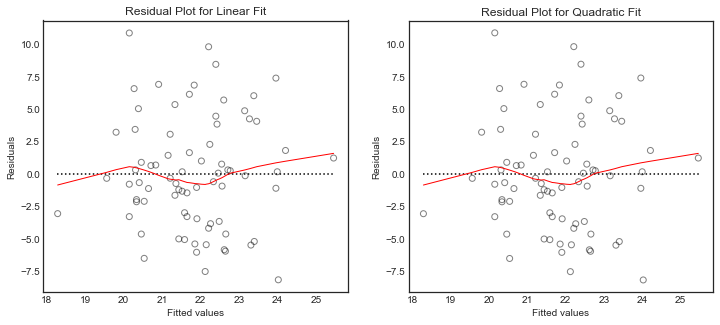

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(df.pred1, df.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(df.pred2, df.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

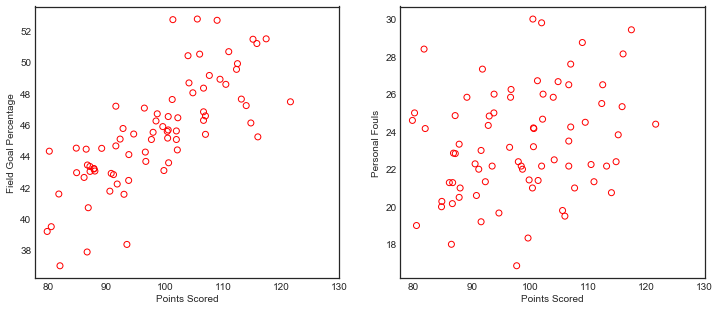

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(df.PTS, df.FGP, facecolor='None', edgecolor='r')
ax1.set_ylabel('Field Goal Percentage')

# Right plot
ax2.scatter(df.PTS, df.PF, facecolor='None', edgecolor='r')
ax2.set_ylabel('Personal Fouls')

for ax in fig.axes:
    ax.set_xlabel('Points Scored')
    ax.set_xticks([80,90,100,110,120,130])

In [16]:
df.head()

,Unnamed: 0,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,...,TRB,AST,STL,BLK,TOV,PF,pred1,resid1,pred2,resid2
0,1,1980,Champion,Lakers,109.500000,45.000000,92.000000,48.913043,0.000000,0.666667,...,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,25.459871,1.206796,25.459871,1.206796
1,2,1980,Runner Up,Sixers,104.166667,43.000000,88.333333,48.679245,0.166667,2.666667,...,37.166667,31.000000,9.333333,10.000000,15.166667,22.500000,20.145804,10.854196,20.145804,10.854196
2,3,1981,Champion,Celtics,96.500000,40.166667,85.333333,47.070312,0.500000,2.833333,...,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,23.959428,-1.126095,23.959428,-1.126095
3,4,1981,Runner Up,Rockets,86.666667,33.833333,89.333333,37.873134,0.500000,1.833333,...,42.666667,18.000000,7.833333,5.666667,13.166667,20.166667,22.208912,-4.208912,22.208912,-4.208912
4,5,1982,Champion,Lakers,112.333333,45.500000,91.833333,49.546279,0.166667,1.500000,...,47.333333,31.333333,10.666667,7.000000,19.333333,25.500000,23.959428,7.373905,23.959428,7.373905


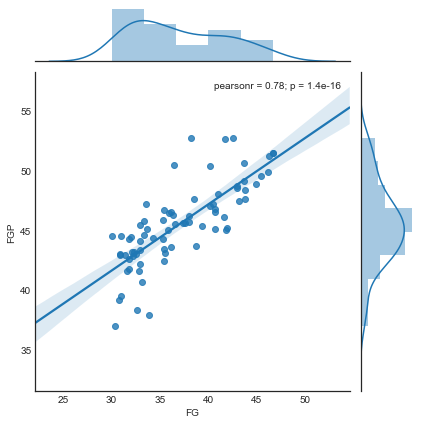

In [31]:
sns.jointplot(x="FG", y="FGP", data=df, kind="reg");


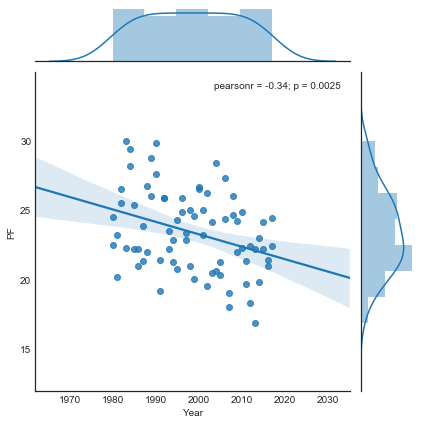

In [19]:
sns.jointplot(x="Year", y="PF", data=df, kind="reg");


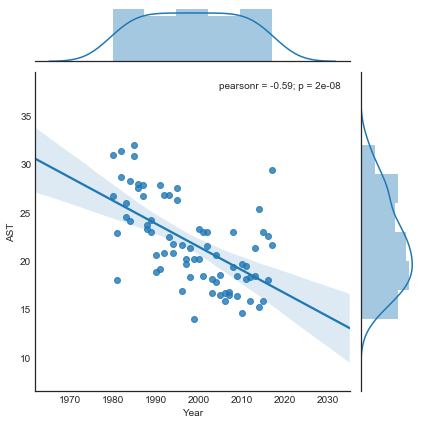

In [20]:
sns.jointplot(x="Year", y="AST", data=df, kind="reg");


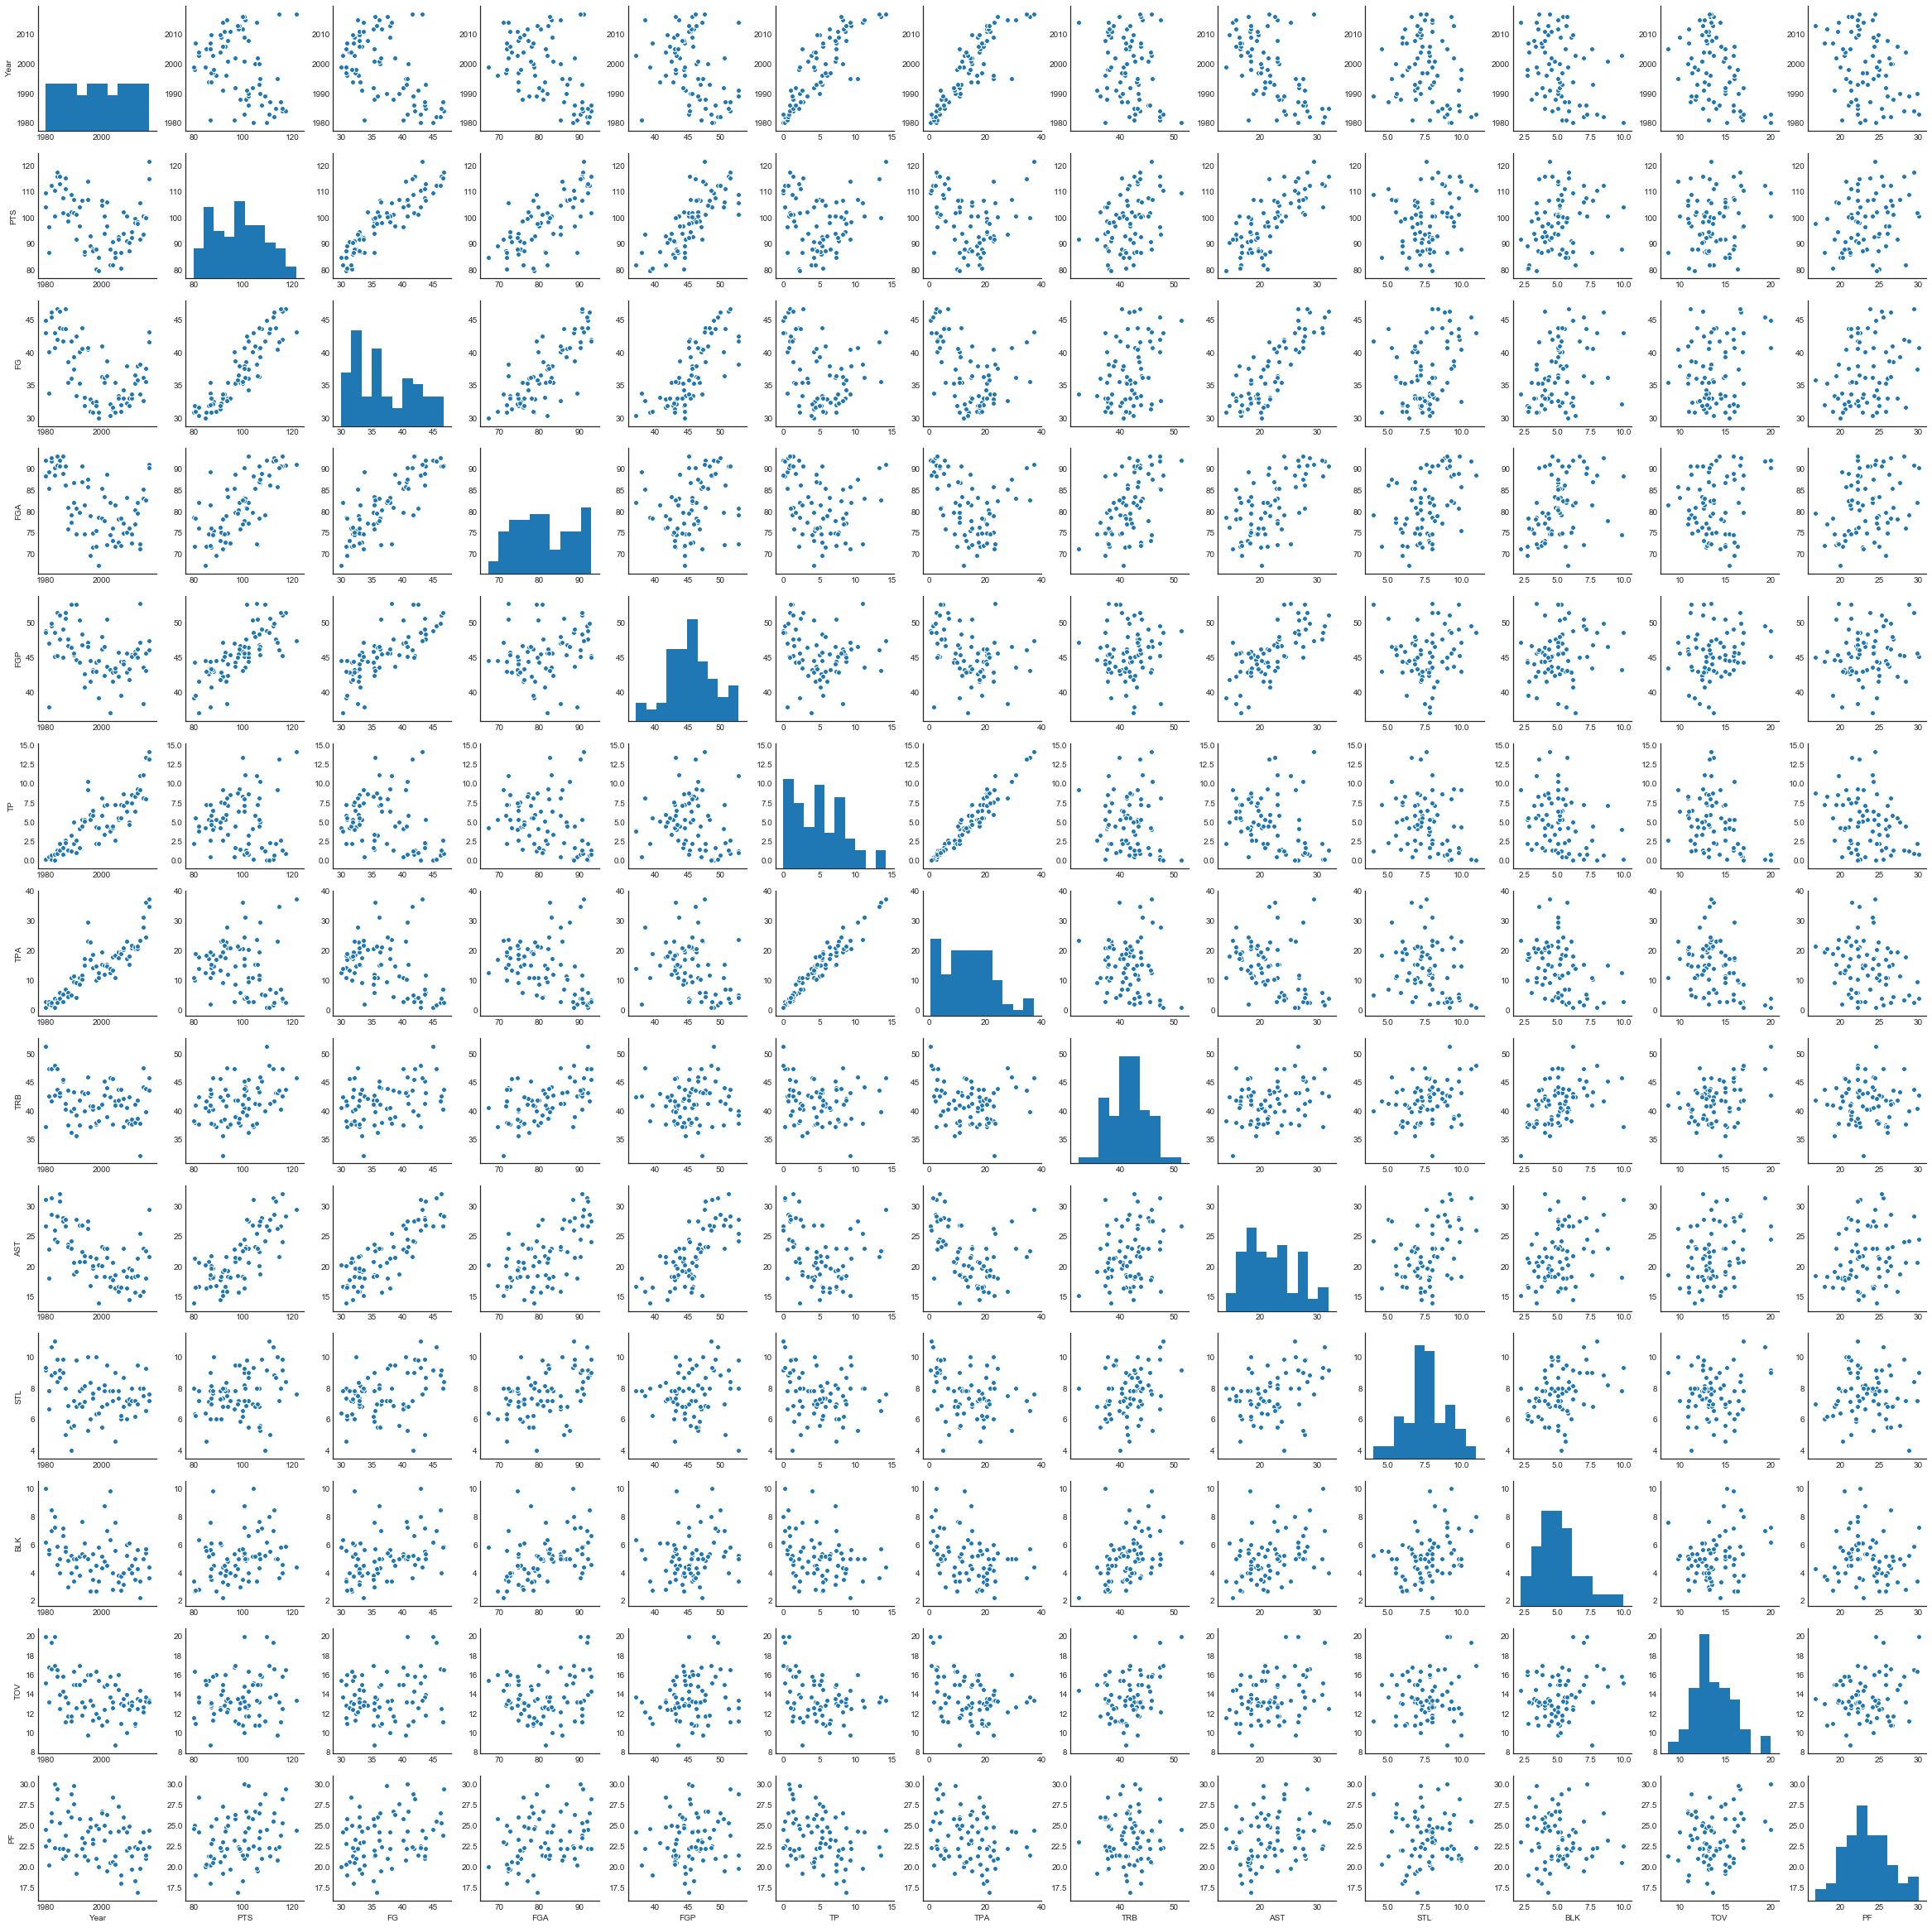

In [18]:
sns.pairplot(df[['Year','Status','Team','PTS','FG','FGA','FGP','TP','TPA','TRB','AST','STL','BLK','TOV','PF']]);